In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

對於目前主流的兩種幣種  
Bitcoin與Ethereum的價格進行迴歸分析
觀察Bitcoin價格對Ethereum的價格的影響

資料來源:https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory 

In [2]:
BTC = pd.read_csv("bitcoin_price.csv")

In [3]:
BTC = BTC.rename(columns = {'Close':'BTC_Close'})

In [4]:
BTC.head()

,Date,Open,High,Low,BTC_Close,Volume,Market Cap
0,"Feb 20, 2018",11231.8,11958.5,11231.80,11403.7,"9,926,540,000","189,536,000,000"
1,"Feb 19, 2018",10552.6,11273.8,10513.20,11225.3,"7,652,090,000","178,055,000,000"
2,"Feb 18, 2018",11123.4,11349.8,10326.00,10551.8,"8,744,010,000","187,663,000,000"
3,"Feb 17, 2018",10207.5,11139.5,10149.40,11112.7,"8,660,880,000","172,191,000,000"
4,"Feb 16, 2018",10135.7,10324.1,9824.82,10233.9,"7,296,160,000","170,960,000,000"


In [5]:
ETH = pd.read_csv("ethereum_price.csv")

In [6]:
ETH = ETH.rename(columns = {'Close':'ETH_Close'})

In [7]:
ETH = ETH.rename(columns = {'Date':'ETH Date'})

In [8]:
ETH.head()

,ETH Date,Open,High,Low,ETH_Close,Volume,Market Cap
0,"Feb 20, 2018",943.57,965.26,892.95,895.37,"2,545,260,000","92,206,500,000"
1,"Feb 19, 2018",921.67,957.78,921.55,943.87,"2,169,020,000","90,047,700,000"
2,"Feb 18, 2018",973.35,982.93,915.45,923.92,"2,567,290,000","95,077,100,000"
3,"Feb 17, 2018",944.75,976.60,940.75,974.12,"2,525,720,000","92,264,000,000"
4,"Feb 16, 2018",934.79,950.00,917.85,944.21,"2,369,450,000","91,272,100,000"


In [9]:
len(BTC)

1760

In [10]:
len(ETH)

929

In [11]:
BTC = BTC[:929]

In [12]:
len(BTC)

929

In [13]:
price = pd.concat([BTC, ETH], axis = 1)

In [14]:
price.drop_duplicates(subset = "Date", keep = 'first', inplace=True)

In [15]:
price.head()

,Date,Open,High,Low,BTC_Close,Volume,Market Cap,ETH Date,Open,High,Low,ETH_Close,Volume,Market Cap
0,"Feb 20, 2018",11231.8,11958.5,11231.80,11403.7,"9,926,540,000","189,536,000,000","Feb 20, 2018",943.57,965.26,892.95,895.37,"2,545,260,000","92,206,500,000"
1,"Feb 19, 2018",10552.6,11273.8,10513.20,11225.3,"7,652,090,000","178,055,000,000","Feb 19, 2018",921.67,957.78,921.55,943.87,"2,169,020,000","90,047,700,000"
2,"Feb 18, 2018",11123.4,11349.8,10326.00,10551.8,"8,744,010,000","187,663,000,000","Feb 18, 2018",973.35,982.93,915.45,923.92,"2,567,290,000","95,077,100,000"
3,"Feb 17, 2018",10207.5,11139.5,10149.40,11112.7,"8,660,880,000","172,191,000,000","Feb 17, 2018",944.75,976.60,940.75,974.12,"2,525,720,000","92,264,000,000"
4,"Feb 16, 2018",10135.7,10324.1,9824.82,10233.9,"7,296,160,000","170,960,000,000","Feb 16, 2018",934.79,950.00,917.85,944.21,"2,369,450,000","91,272,100,000"


In [22]:
price_close = price.loc[:,["Date","BTC_Close","ETH_Close"]]

In [23]:
price_close.head()

,Date,BTC_Close,ETH_Close
0,"Feb 20, 2018",11403.7,895.37
1,"Feb 19, 2018",11225.3,943.87
2,"Feb 18, 2018",10551.8,923.92
3,"Feb 17, 2018",11112.7,974.12
4,"Feb 16, 2018",10233.9,944.21


In [24]:
regr = LinearRegression()

In [28]:
X = price_close.BTC_Close.values.reshape(len(price_close.BTC_Close), 1)

In [30]:
Y = price_close.ETH_Close.values.reshape(len(price_close.ETH_Close), 1)

In [31]:
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
Y = regr.predict(X)

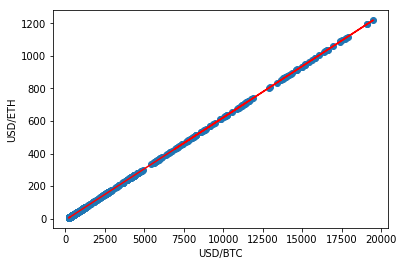

In [37]:
plt.scatter(X, Y)
plt.plot(X, Y, 'r' )

plt.xlabel("BTC/USD")
plt.ylabel('ETH/USD')